In [23]:
# 설치
# !pip install colour
import cv2 as cv
import numpy as np
import colour
import utils
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [13]:
# 사진 불러오기
img = cv.imread("img/4.jpg")

In [14]:
# 위에서 이미지 불러와서 img에 저장하면
# img는 3차원형태의 ndarray가 된다.

# return값은 height, width, channel이다.
# 이때 channel이 RGB3채널을 의미해서 3이라는 결과가 나온다.. (RGB가 아닌 BGR 순서이다.)

# 그래서 BGR  -> RGB로 바꿔준다.  헷갈리기 때문에
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [15]:
# 그리고 차원이 분산되어있으므로 가로,세로는 하나의 array로 통합
img = img.reshape((img.shape[0]*img.shape[1], 3))
print(img.shape)

(214000, 3)


In [16]:
# 알고리즘으로 이미지 학습을 시킨다.
# scikit-learn의 k-mean 알고리즘 사용

# k개의 데이터 평균을 만들어 clustering 할 생각

k = 5
clt = KMeans(n_clusters=k)
#학습시키기
clt.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
# 테스트용으로 한가지 색밖에 없는 이미지를 사용하긴 했지만
# 나중에 피부색을 추출하면 여러색이 분포되어있을테니 비율을 정하는 함수를 만든다.

def color_ratio(clt) :
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    
    hist = hist.astype("float")
    hist /= hist.sum()
    
    return hist

hist = color_ratio(clt)
print(hist)


# k=5이므로 다섯개의 영역에 얼마만큼의 퍼센테이지가 차지되었는지 return된다.


[0.28033178 0.27799533 0.11685981 0.15358411 0.17122897]


In [21]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
        
    # return the bar chart
    return bar

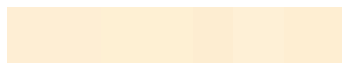

In [24]:
hist = color_ratio(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()